In [1]:
import numpy as np
from os import path
import pandas as pd
from pandas.io.excel import read_excel
import matplotlib as mpl
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from pandas import ExcelWriter
import itertools

data_dir='/Users/edqvist/Documents/VMSpaper/results2021'
file = 'IE_generation.xlsx'

xls_file = pd.ExcelFile(path.join(data_dir, file))
df_gen = xls_file.parse('Sheet2')
df_gen = df_gen.replace('Eps', 0)
df_gen = df_gen.replace('NaN', 0)
df_gen = df_gen.replace('Undf', 0)

#df_gen = df_gen.dropindex
df_gen.set_index('tech', inplace=True)
df_gen = df_gen.fillna(0)
df_disp = df_gen.T
df_disp

tech,RO,W,WONA2,WONA3,WONA4,WONA5,WONB5,WOFF,PVPA1,WG,WG_peak,electrolyser,EB,H2store,bat,bat_cap,PIT_heat,Tank_heat
d001a,0.0,0.0,0.000000,0.000000,0.000000,5.588046,0.000000,0.000000,0.0,0.0,0.0,1.661385,0.358916,38.584895,0.421779,0.420579,53.590104,0.461219
d001b,0.0,0.0,0.000000,0.000000,0.000000,5.795631,0.000000,0.023358,0.0,0.0,0.0,1.661385,0.358916,39.106148,0.000000,0.000000,53.577414,0.461110
d001c,0.0,0.0,0.000000,0.000000,0.000000,5.472462,0.000000,0.000000,0.0,0.0,0.0,1.661385,0.358916,39.627401,0.000000,0.000000,53.564728,0.461001
d001d,0.0,0.0,0.004317,0.213797,2.442577,2.480103,0.000000,0.023340,0.0,0.0,0.0,1.661385,0.358916,40.148654,0.000000,0.000000,53.552045,0.460892
d001e,0.0,0.0,0.000000,0.000000,0.000000,4.943122,0.000000,0.000000,0.0,0.0,0.0,1.661385,0.358916,40.669907,0.000000,0.000000,53.539365,0.460783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d365t,0.0,0.0,0.006398,0.242556,2.565611,4.091756,0.000000,0.000000,0.0,0.0,0.0,1.661385,0.358916,35.978629,0.000000,0.000000,52.390340,0.398478
d365u,0.0,0.0,0.006206,0.243185,0.589794,6.080462,0.000558,0.023074,0.0,0.0,0.0,1.661385,0.358916,36.499882,0.000000,-0.199306,52.628124,0.398384
d365v,0.0,0.0,0.006354,0.244235,2.572517,3.704910,0.000399,0.000000,0.0,0.0,0.0,1.661385,0.358916,37.021135,0.199875,0.000000,52.866988,0.398290
d365x,0.0,0.0,0.000000,0.000000,0.000000,6.070893,0.000439,0.021756,0.0,0.0,0.0,1.661385,0.358916,37.542388,0.199875,0.199306,53.106936,0.398195


In [2]:
df_disp['Wind'] = df_disp['WONA2']+df_disp['WONA3']+df_disp['WONA4']+df_disp['WONA5']+df_disp['WONB5']+df_disp['WOFF']
df_disp['bat_ch'] = df_disp['bat'].diff().shift(-1)


df_disp['Demand El'] = df_disp['Wind']+df_disp['W']+df_disp['WG']+df_disp['WG_peak']+df_disp['PVPA1']-df_disp['EB']-df_disp['electrolyser']-df_disp['bat_ch']
df_disp['netload'] = df_disp['W']+df_disp['WG']+df_disp['WG_peak']-df_disp['EB']-df_disp['electrolyser']-df_disp['bat_ch']
df_disp['netload H2']= df_disp['W']+df_disp['WG']+df_disp['WG_peak']-df_disp['EB']-df_disp['bat_ch']
df_disp['netload BAT']= df_disp['W']+df_disp['WG']+df_disp['WG_peak']-df_disp['EB']-df_disp['electrolyser']
df_disp['netload CCGT']= df_disp['W']+df_disp['WG_peak']-df_disp['EB']-df_disp['electrolyser']-df_disp['bat_ch']
df_disp['netload HEAT']= df_disp['W']+df_disp['WG']+df_disp['WG_peak']-df_disp['electrolyser']-df_disp['bat_ch']
df_disp['netload GT']= df_disp['W']+df_disp['WG']-df_disp['EB']-df_disp['electrolyser']-df_disp['bat_ch']

df_disp.to_excel(path.join(data_dir,"dataIE.xlsx"),columns=['netload','bat','electrolyser','bat_ch','RO', 'Demand El','Wind','PVPA1'], sheet_name = "netload")

#df_disp['x1'] = range(0,len(df_disp))
#df_disp.plot(kind='scatter', x='x1', y='netload BAT')


In [41]:
import math
net_load=((-1)*df_disp['bat_ch'])
#net_load=(df_disp['WG_peak'])
d = {'net load': net_load,'count1':0,'count2':0}
df_netload = pd.DataFrame(data=d)
#maxind, maxval = max(net_load, key=lambda item: item[1])
maxval=int(math.ceil(df_disp['netload'].max()))
minval=int(math.floor(df_disp['netload'].min()))
amps = np.arange(minval, maxval, 0.1).tolist()

In [42]:
#kolla på diffen av detta
df_freq = pd.DataFrame()
output = {}
for amp in amps:
    d = {'net load': net_load,'count1':0,'count2':0}
    df_netload = pd.DataFrame(data=d)
    s=[]
    
    dfrows=df_netload.index
    rowbefore='d001b'
#ökande siffra när värde över amp
    for row in dfrows:
        if amp>0 and df_netload.at[row,'net load']>amp:
#            df_netload.set_value(row, 'count1', df_netload.at[rowbefore,'count1']+1)
            df_netload.at[row, 'count1']= df_netload.at[rowbefore,'count1']+1
        elif amp<0 and df_netload.at[row,'net load']<amp:
#            df_netload.set_value(row, 'count1', df_netload.at[rowbefore,'count1']+1)
            df_netload.at[row, 'count1']= df_netload.at[rowbefore,'count1']+1
        rowbefore=row

    rowbefore='d001b'
#varje periods längd vid sluttillfället
    for row in dfrows:
        if amp >0 and df_netload.at[rowbefore,'net load']>amp and df_netload.at[row,'net load']<amp:
#            df_netload.set_value(rowbefore, 'count2', df_netload.at[rowbefore,'count1'])
            df_netload.at[rowbefore, 'count2']= df_netload.at[rowbefore,'count1']
        elif amp<0 and df_netload.at[rowbefore,'net load']<amp and df_netload.at[row,'net load']>amp:
#            df_netload.set_value(rowbefore, 'count2', df_netload.at[rowbefore,'count1'])
            df_netload.at[rowbefore, 'count2']= df_netload.at[rowbefore,'count1']
        rowbefore=row
        
    s=df_netload.count2.value_counts() 
    df_freq=pd.DataFrame(data=s)
#    s_form=list(s)
    output[amp]=df_freq
    

In [43]:
#df_out=pd.DataFrame(data=output, index=[amp])
df_out = pd.DataFrame()
df_out_tot = pd.DataFrame()
output2 = {}
for amp in amps:
    df_out = output[amp] 
    df_out = df_out.iloc[1:]
    df_out.index.name = 'Duration'
    df_out = pd.concat([df_out], keys=[amp], names=['Amplitude'])
    df_out.rename(columns={'count2':'Occurences'}, inplace=True)
    df_out_tot=df_out_tot.append(df_out)
#    output2[amp] = df_out
#df_out[0]
df_out_tot

Occurences
Amplitude Duration            
-3.4      1                 64
          2                 31
          3                 25
          5                 18
          4                 16
...                        ...
 3.4      2                 20
          4                 10
          3                  8
          5                  2
          6                  1

[818 rows x 1 columns]

In [44]:
df_reset = df_out_tot.reset_index()
df_reset.columns = ['Amplitude', 'Duration', 'Occurrence']
df_pivot=df_reset.pivot('Amplitude', 'Duration')

X=df_pivot.columns.levels[1].values
Y=df_pivot.index.values
Z=df_pivot.values
#df1['A'] = df1['A'].apply(lambda x: [y if y <= 9 else 11 for y in x])
Z_BAT=np.where(Z > 50, 50, Z)
X_BAT,Y_BAT = np.meshgrid(X, Y)


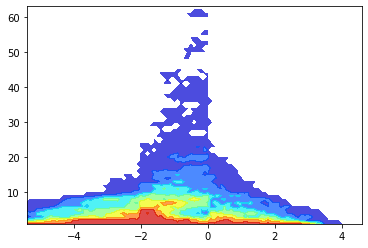

In [24]:
plt.contourf(Ynetload, Xnetload, Znetload, alpha=0.7, cmap=plt.cm.jet);

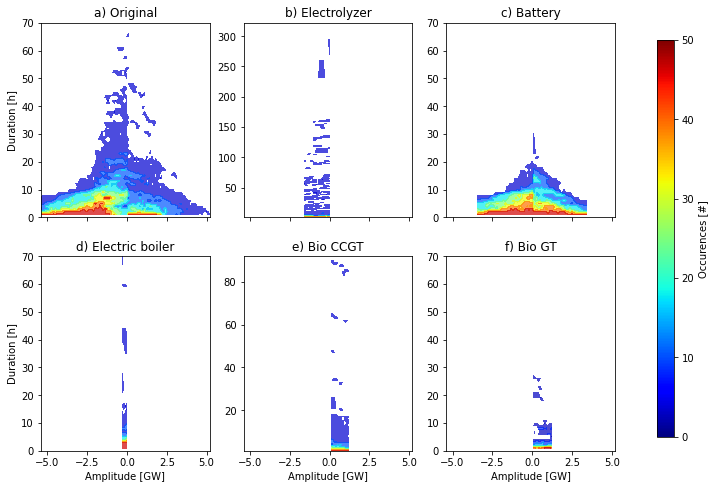

In [45]:
#Znetload, Xnetload, Ynetload
#Z_H2diff, X_H2diff, Y_H2diff
fig,([ax1,ax2,ax3],[ax4,ax5,ax6]) = plt.subplots(2,3,figsize=(30/2.54,20/2.54),sharey=False, sharex=True)


ax1.contourf(Ynetload, Xnetload, Znetload, alpha=0.7, cmap=plt.cm.jet);
ax2.contourf(Y_H2, X_H2, Z_H2, alpha=0.7, cmap=plt.cm.jet);
ax3.contourf(Y_BAT, X_BAT, Z_BAT, alpha=0.7, cmap=plt.cm.jet);
ax4.contourf(Y_HEAT, X_HEAT, Z_HEAT, alpha=0.7, cmap=plt.cm.jet);
ax5.contourf(Y_CCGT, X_CCGT, Z_CCGT, alpha=0.7, cmap=plt.cm.jet);
ax6.contourf(Y_GT, X_GT, Z_GT, alpha=0.7, cmap=plt.cm.jet);
#ax2.contourf(Y_BAT, X_B, Z_BAT, alpha=0.7, cmap=plt.cm.jet);
#ax1.contourf(Y_BATdiff, X_BATdiff, Z_BATdiff, alpha=0.7, cmap=plt.cm.jet);

ax3.set_ylim(0,70)
ax1.set_ylim(0,70)
ax4.set_ylim(0,70)

ax4.set_ylim(0,70)
#ax5.set_ylim(0,70)
ax6.set_ylim(0,70)
#ax1.set_ylim(0,50)
#plt.zlim(0,100)
cmap = plt.cm.jet
norm = mpl.colors.Normalize(vmin=0, vmax=50)

#fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#             orientation='vertical', label='Occurences [#]')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax,label='Occurences [#]')

#X=df_out_tot.index.levels[0].values
#Y=df_out_tot.index.levels[1].values
#Z=df_out_tot['Occurences']
#Zi = np.reshape(Z, (X, Y))
#Xi,Yi = np.meshgrid(X, Y)
#plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet);
#Z
ax1.title.set_text('a) Original')
ax2.title.set_text('b) Electrolyzer')
ax3.title.set_text('c) Battery')
ax4.title.set_text('d) Electric boiler')
ax5.title.set_text('e) Bio CCGT')
ax6.title.set_text('f) Bio GT')
ax1.set_ylabel('Duration [h]')
ax4.set_ylabel('Duration [h]')
#ax3.set_ylabel('[100 recurrences]')
ax4.set_xlabel('Amplitude [GW]')
ax5.set_xlabel('Amplitude [GW]')
ax6.set_xlabel('Amplitude [GW]')

fig.savefig(path.join(data_dir,'IE_contour_VMS2.png'), dpi=600)